                 Model  Accuracy  F1_score  Inference_Time  Model_Size  \
2          Naive Bayes        82      0.81              25          30   
0  Logistic Regression        85      0.84              40          50   
1                  SVM        88      0.87              70         120   
3        Random Forest        86      0.85              90         200   

      Score  Rank  
2  0.901696   1.0  
0  0.813106   2.0  
1  0.401331   3.0  
3  0.067714   4.0  


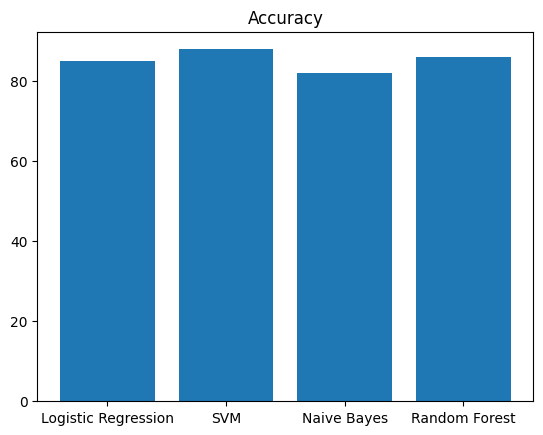

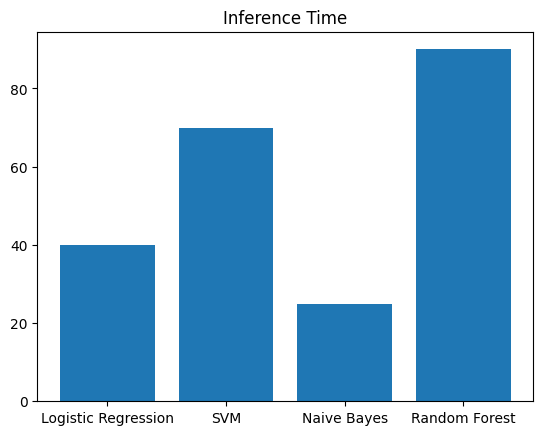

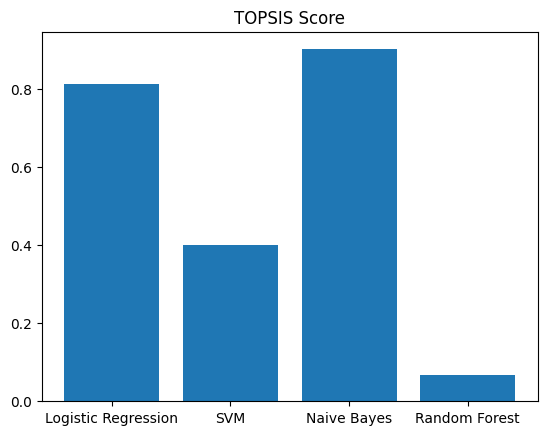

Best Model: Naive Bayes


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Model": ["Logistic Regression", "SVM", "Naive Bayes", "Random Forest"],
    "Accuracy": [85, 88, 82, 86],
    "F1_score": [0.84, 0.87, 0.81, 0.85],
    "Inference_Time": [40, 70, 25, 90],
    "Model_Size": [50, 120, 30, 200]
}

df = pd.DataFrame(data)

weights = np.array([0.35, 0.30, 0.20, 0.15])
impacts = ['+', '+', '-', '-']

m = df.iloc[:, 1:].values.astype(float)
n = m / np.sqrt((m ** 2).sum(axis=0))
w = n * weights

ib, iw = [], []
for i in range(len(impacts)):
    if impacts[i] == '+':
        ib.append(w[:, i].max())
        iw.append(w[:, i].min())
    else:
        ib.append(w[:, i].min())
        iw.append(w[:, i].max())

ib, iw = np.array(ib), np.array(iw)

db = np.sqrt(((w - ib) ** 2).sum(axis=1))
dw = np.sqrt(((w - iw) ** 2).sum(axis=1))

df["Score"] = dw / (db + dw)
df["Rank"] = df["Score"].rank(ascending=False)

print(df.sort_values("Rank"))

plt.bar(df["Model"], df["Accuracy"])
plt.title("Accuracy")
plt.show()

plt.bar(df["Model"], df["Inference_Time"])
plt.title("Inference Time")
plt.show()

plt.bar(df["Model"], df["Score"])
plt.title("TOPSIS Score")
plt.show()

print("Best Model:", df.sort_values("Rank").iloc[0]["Model"])
